<a href="https://colab.research.google.com/github/keetrak17/keetrak_leranbay_project/blob/main/Customer_Retention_Modeling_and_Strategy_for_Telecom_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML Project

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/TelcoChurn.xlsx')
    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Setting Display options to ensure feature name visibility

In [ ]:
pd.set_option('display.max_columns',None)

# Warning Suppression 

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# How many rows have missing ID ?

In [ ]:
df['customerID'].isnull().sum()

0

# Drop ID Feature from the dataset

In [ ]:
df=df.drop(['customerID'],axis=1)

# Label the Churn feature to 1/0

In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df['target']=np.where(df['Churn']=="Yes",1,0)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,target
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


# Drop the Churn feature to retain only Target 

In [ ]:
df=df.drop(['Churn'],axis=1)

# Defining Target and Independent Features

In [ ]:
Y=df[['target']]

X=df.drop(['target'],axis=1)

# Get the Churn Rate

In [ ]:
Y.mean()

target    0.26537
dtype: float64

# Split features into Numerical and Categorical

In [ ]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [ ]:
num.tail()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60
7042,0,66,105.65,6844.50


In [ ]:
#Check whether SeniorCitizon feaure is an indicator
num.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
char.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


# Dropping the indicator features from num to build a separate DF

In [ ]:
ind=num[['SeniorCitizen']]
num=num.drop(['SeniorCitizen'],axis=1)

In [ ]:
num.dtypes

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [ ]:
ind.dtypes

SeniorCitizen    int64
dtype: object

In [ ]:
char.dtypes

gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
dtype: object

# Outlier Analysis of Numerical Features

In [ ]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
1%,1.000000,19.200000,19.871000
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


# Capping and Flooring of outliers

In [ ]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [ ]:
num1=num.apply(lambda x : outlier_cap(x))

In [ ]:
num1.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.749689,2277.243407
std,24.557454,30.062810,2260.002318
min,1.000000,19.200000,19.871000
1%,1.000000,19.200000,19.883180
5%,1.000000,19.650000,49.070000
10%,2.000000,20.050000,83.470000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000


# Missing Value Analysis

In [ ]:
num.isnull().mean()

tenure            0.0
MonthlyCharges    0.0
TotalCharges      0.0
dtype: float64

In [ ]:
# Since the data does not contain any missing values Imputation Processes are not required
# X = X.loc[:, X.isnull().mean() <= .25]

# Feature Selection - Numerical Features 

# Part 1 : Remove Features with 0 Variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold

varselector= VarianceThreshold(threshold=0)
varselector.fit_transform(num1)
# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices=True)
num_1 = num1.iloc[:,cols]

In [ ]:
num_1.iloc[0]

tenure             1.00
MonthlyCharges    29.85
TotalCharges      29.85
Name: 0, dtype: float64

# Part 2 - Bi Variate Analysis (Feature Discretization)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_1),index=num_1.index, columns=num_1.columns).add_suffix('_Rank')
num_binned.head()

,tenure_Rank,MonthlyCharges_Rank,TotalCharges_Rank
0,0.0,2.0,0.0
1,5.0,3.0,5.0
2,1.0,3.0,1.0
3,6.0,2.0,5.0
4,1.0,5.0,1.0


In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
?KBinsDiscretizer

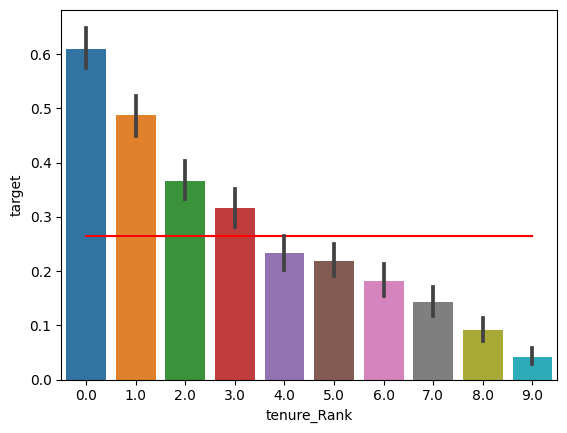

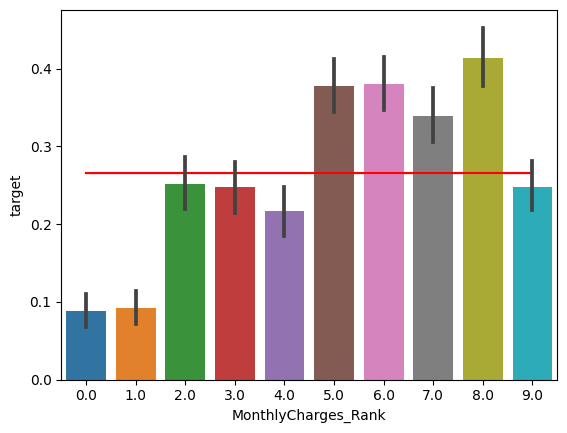

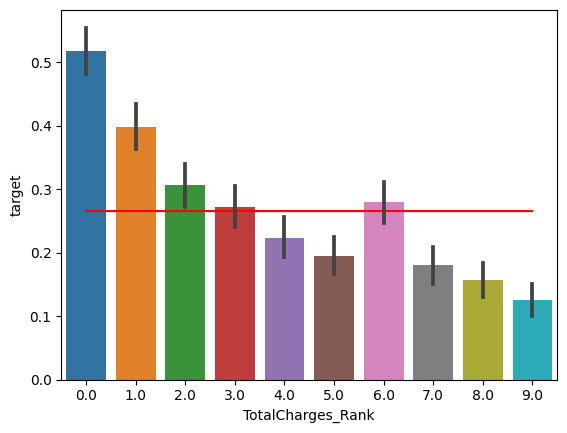

In [ ]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['target'].mean(),data=X_bin_combined,color = 'red')
    sns.barplot(x=col, y="target",data=X_bin_combined, estimator=mean )
plt.show()

In [ ]:
# All features from num_1 will get selected due to good discrimination power by all of them
select_features_df_num=num_1

In [ ]:
select_features_df_num.shape

(7043, 3)

# Feature Selection - Categorical Features 

# Part 1 - Bi Variate Analysis

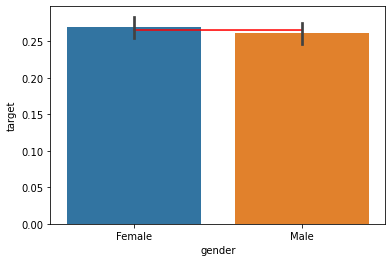

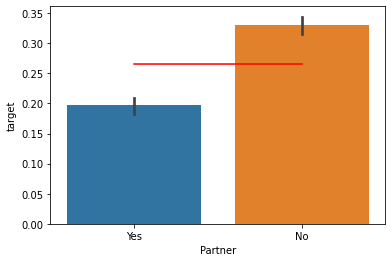

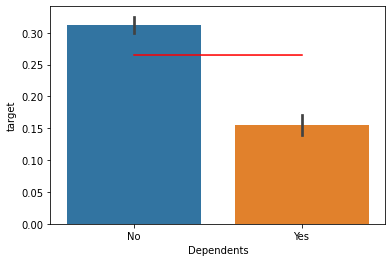

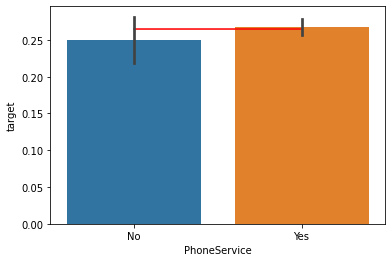

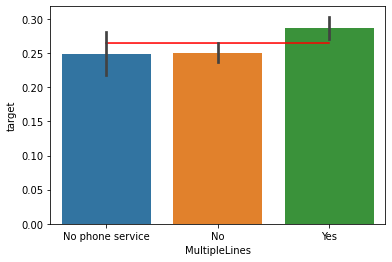

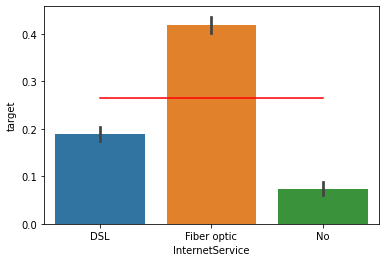

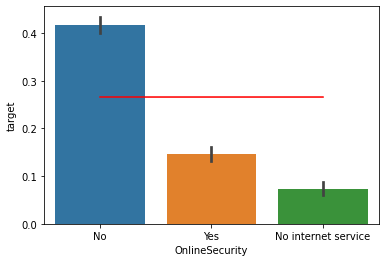

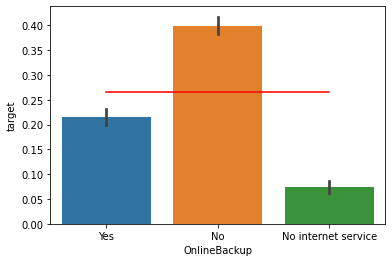

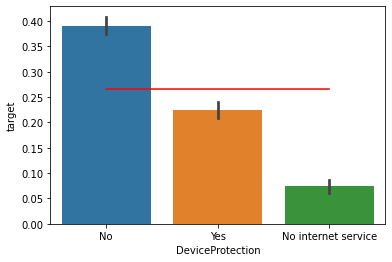

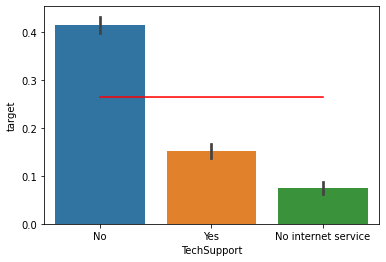

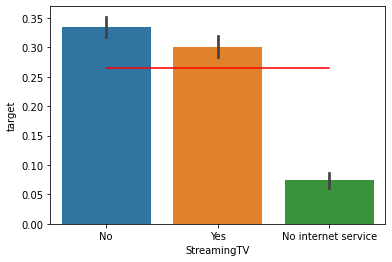

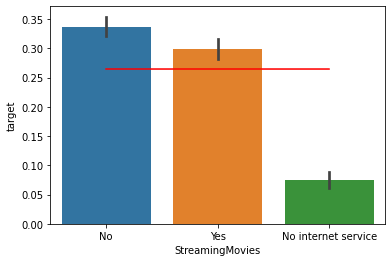

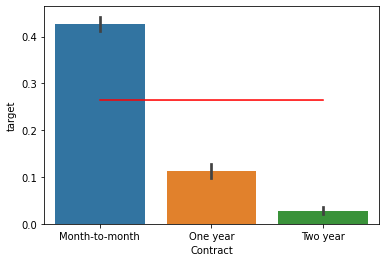

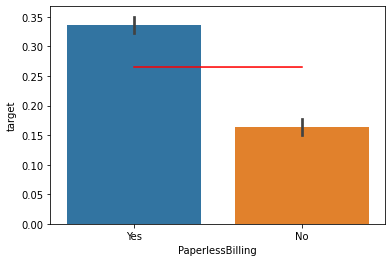

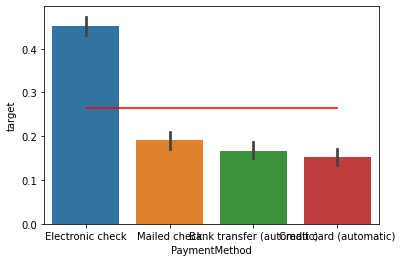

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['target'].mean(),data=X_char_merged,color = 'red')
    sns.barplot(x=col, y="target",data=X_char_merged, estimator=mean )
plt.show()

In [ ]:
char=char.drop(['gender','PhoneService','MultipleLines'],axis=1)

In [ ]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

(7043, 22)

In [ ]:
X_char_dum

,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,1,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Part 2 - Select K Best

In [ ]:
# Select K Best for Categorical Features
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit_transform(X_char_dum, Y)
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = X_char_dum.iloc[:,cols]

In [ ]:
select_features_df_char.shape

(7043, 20)

# Feature Selection - Numerical Indicator Features 

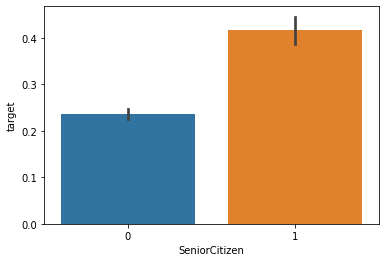

In [ ]:
X_ind_merged=pd.concat([Y,ind],axis=1,join='inner')
from numpy import mean
for col in (ind.columns):
    plt.figure()
    sns.barplot(x=col, y="target",data=X_ind_merged, estimator=mean )
plt.show()

In [ ]:
select_features_df_ind=ind

# Creating the Master Feature Set for Model Development

In [ ]:
X_all=pd.concat([select_features_df_char,select_features_df_num,select_features_df_ind],axis=1,join="inner")

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_all, Y, test_size=0.3, random_state=99)

In [ ]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Churn Rate in Training Data",y_train.mean())
print("Churn Rate in Testing Data",y_test.mean())

Shape of Training Data (4930, 24)
Shape of Testing Data (2113, 24)
Churn Rate in Training Data target    0.265314
dtype: float64
Churn Rate in Testing Data target    0.265499
dtype: float64


# Model Building Step

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(verbose = 2,random_state=99)
logreg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=99, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [ ]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Partner_Yes,-0.030561
1,Dependents_Yes,-0.247903
2,InternetService_Fiber optic,0.470012
3,InternetService_No,-0.168064
4,OnlineSecurity_No internet service,-0.168064
5,OnlineSecurity_Yes,-0.503493
6,OnlineBackup_No internet service,-0.168064
7,OnlineBackup_Yes,-0.228544
8,DeviceProtection_No internet service,-0.168064
9,DeviceProtection_Yes,-0.120169


In [ ]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=99)

In [ ]:
# np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7],
              'min_samples_split': [50, 100, 150, 200, 250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 50}


In [ ]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=99,max_depth=5,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=99, splitter='best')

In [ ]:
!pip install pydotplus

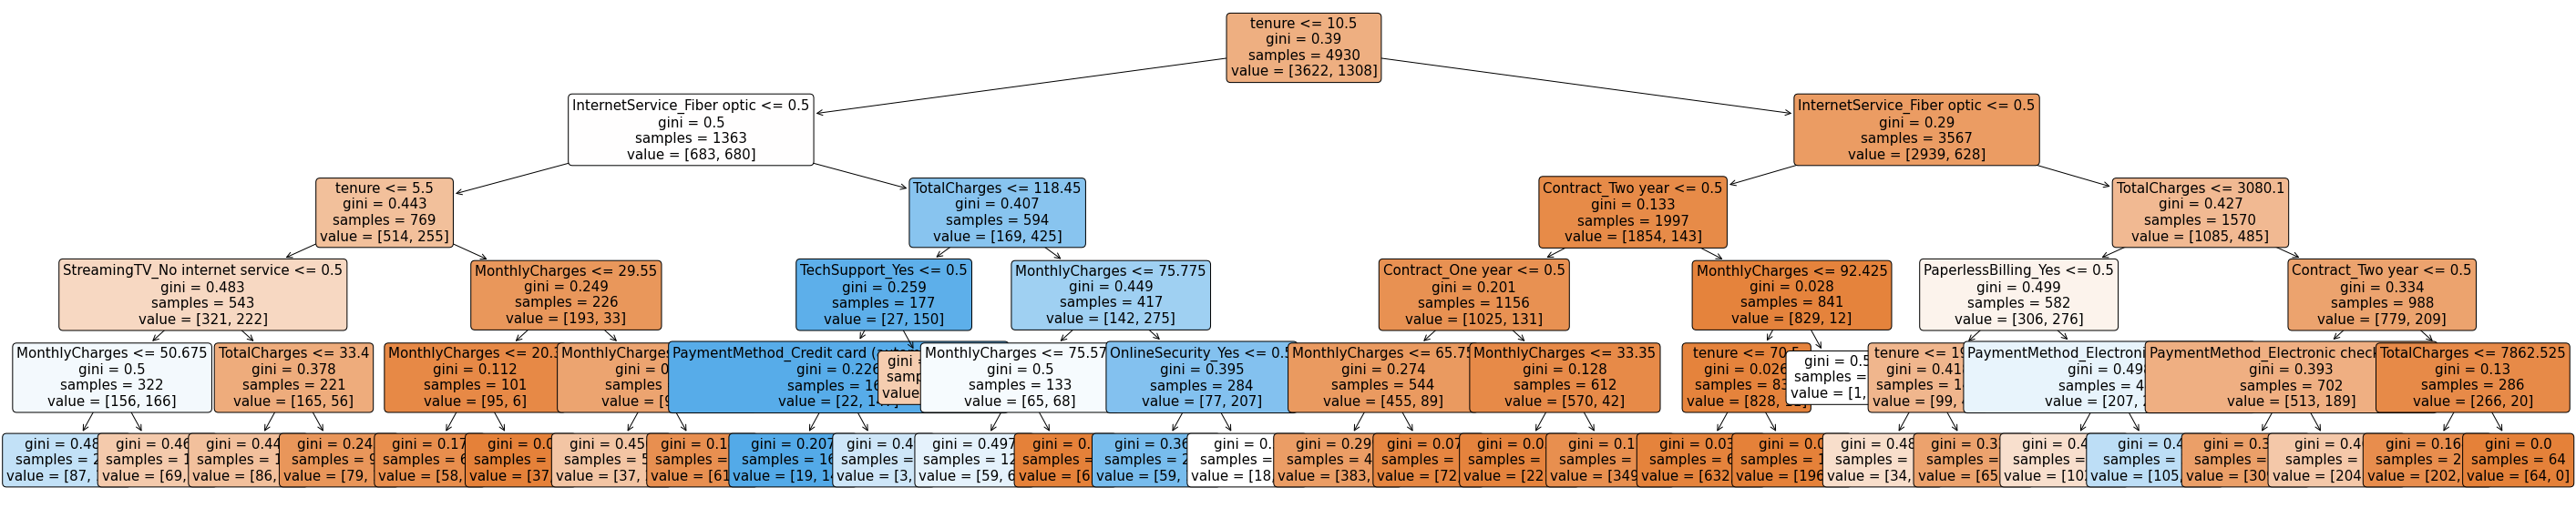

In [ ]:
from sklearn import tree
import pydotplus
import matplotlib.pyplot as plt
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=X_all.columns)
plt.show()

In [ ]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=99,max_depth=5,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

In [ ]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.213552
InternetService_Fiber optic,0.128400
TotalCharges,0.127799
PaymentMethod_Electronic check,0.094519
Contract_Two year,0.092967
MonthlyCharges,0.055133
Contract_One year,0.035816
OnlineSecurity_Yes,0.034972
PaperlessBilling_Yes,0.029200
TechSupport_Yes,0.024754


In [ ]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=99,max_depth=5,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=50,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=99, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
tenure,0.269059
InternetService_Fiber optic,0.181855
TotalCharges,0.165762
MonthlyCharges,0.145374
PaymentMethod_Electronic check,0.063299
Contract_Two year,0.042024
Contract_One year,0.027850
PaperlessBilling_Yes,0.025060
OnlineSecurity_Yes,0.015583
TechSupport_Yes,0.011641


In [ ]:
base_learners = [
                        ('rf', RandomForestClassifier(criterion='gini',random_state=99,max_depth=5,min_samples_split=50)),
                        ('gbm', GradientBoostingClassifier(criterion='mse',random_state=99,max_depth=5,min_samples_split=50))  
                       ] 

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

In [ ]:
clf.fit(X_train, y_train)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=5,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=50,
                                       

In [ ]:
# Model Evaluation
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_stacking=clf.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision",metrics.precision_score(y_test,y_pred_logreg))
print("Recall",metrics.recall_score(y_test,y_pred_logreg))
print("f1_score",metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.7960246095598675
Precision 0.6413043478260869
Recall 0.5258467023172906
f1_score 0.5778648383937316


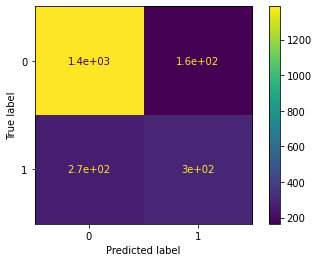

In [ ]:
metrics.plot_confusion_matrix(logreg,X_test,y_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.7889256980596309
Precision 0.631578947368421
Recall 0.4919786096256685
f1_score 0.5531062124248498


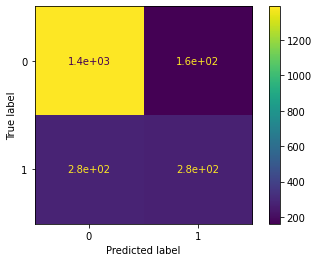

In [ ]:
metrics.plot_confusion_matrix(dtree,X_test,y_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.792238523426408
Precision 0.6703910614525139
Recall 0.42780748663101603
f1_score 0.5223068552774756


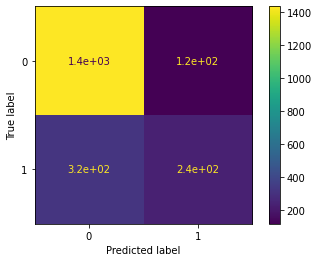

In [ ]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.7898722195929957
Precision 0.6314606741573033
Recall 0.5008912655971479
f1_score 0.5586481113320079


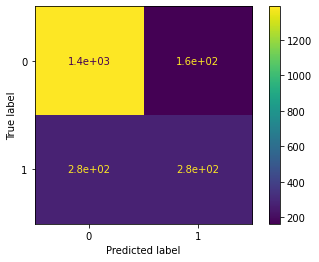

In [ ]:
metrics.plot_confusion_matrix(gbm,X_test,y_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_stacking))
print("Precision",metrics.precision_score(y_test,y_pred_stacking))
print("Recall",metrics.recall_score(y_test,y_pred_stacking))
print("f1_score",metrics.f1_score(y_test,y_pred_stacking))

Accuracy: 0.7988641741599621
Precision 0.6634615384615384
Recall 0.4919786096256685
f1_score 0.5649948822927328


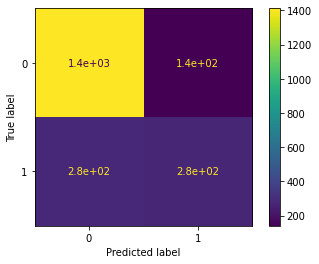

In [ ]:
metrics.plot_confusion_matrix(clf,X_test,y_test)

In [ ]:
# Lorenz Curve

In [ ]:
# Decsion Tree Lorenz Curve

In [ ]:
y_pred_prob = logreg.predict_proba(X_all)[:, 1]
y_pred_prob

array([0.59645111, 0.06682531, 0.34393507, ..., 0.33966641, 0.69726064,
       0.08960079])

In [ ]:
df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,pred_prob_logreg
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.596451
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0.066825
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.343935
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.024790
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.773105


In [ ]:
 df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
 df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,pred_prob_logreg,P_Rank_logreg
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0.596451,9
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0.066825,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0.343935,7
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0.024790,2
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0.773105,10


In [ ]:
rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
rank_df_actuals

,count,mean
P_Rank_logreg,,
1,705,0.012766
2,704,0.028409
3,704,0.059659
4,704,0.079545
5,705,0.156028
6,704,0.238636
7,704,0.299716
8,704,0.450284
9,704,0.578125


In [ ]:
rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
rank_df_predicted

,mean
P_Rank_logreg,
1,0.007330
2,0.025244
3,0.054902
4,0.096598
5,0.151687
6,0.221985
7,0.326390
8,0.457189
9,0.593692


In [ ]:
rank_df_actuals=pd.DataFrame(rank_df_actuals)
rank_df_actuals

,count,mean
P_Rank_logreg,,
1,705,0.012766
2,704,0.028409
3,704,0.059659
4,704,0.079545
5,705,0.156028
6,704,0.238636
7,704,0.299716
8,704,0.450284
9,704,0.578125


In [ ]:
rank_df_predicted=pd.DataFrame(rank_df_predicted)

In [ ]:
rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)

In [ ]:
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")
rank_df

,count,Actual_event_rate,Predicted_event_rate
P_Rank_logreg,,,
1,705,0.012766,0.007330
2,704,0.028409,0.025244
3,704,0.059659,0.054902
4,704,0.079545,0.096598
5,705,0.156028,0.151687
6,704,0.238636,0.221985
7,704,0.299716,0.326390
8,704,0.450284,0.457189
9,704,0.578125,0.593692


In [ ]:
sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
sorted_rank_df

,count,Actual_event_rate,Predicted_event_rate
P_Rank_logreg,,,
10,705,0.750355,0.739762
9,704,0.578125,0.593692
8,704,0.450284,0.457189
7,704,0.299716,0.326390
6,704,0.238636,0.221985
5,705,0.156028,0.151687
4,704,0.079545,0.096598
3,704,0.059659,0.054902
2,704,0.028409,0.025244


In [ ]:
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()
sorted_rank_df

,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap
P_Rank_logreg,,,,,,,
10,705,0.750355,0.739762,529.0,529.0,0.283039,0.283039
9,704,0.578125,0.593692,407.0,936.0,0.217764,0.500803
8,704,0.450284,0.457189,317.0,1253.0,0.169609,0.670412
7,704,0.299716,0.326390,211.0,1464.0,0.112895,0.783307
6,704,0.238636,0.221985,168.0,1632.0,0.089888,0.873194
5,705,0.156028,0.151687,110.0,1742.0,0.058855,0.932049
4,704,0.079545,0.096598,56.0,1798.0,0.029963,0.962012
3,704,0.059659,0.054902,42.0,1840.0,0.022472,0.984484
2,704,0.028409,0.025244,20.0,1860.0,0.010701,0.995185


In [ ]:
sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()
sorted_rank_df

,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap
P_Rank_logreg,,,,,,,,,,,
10,705,0.750355,0.739762,529.0,529.0,0.283039,0.283039,176.0,176.0,0.034016,0.034016
9,704,0.578125,0.593692,407.0,936.0,0.217764,0.500803,297.0,473.0,0.057402,0.091419
8,704,0.450284,0.457189,317.0,1253.0,0.169609,0.670412,387.0,860.0,0.074797,0.166216
7,704,0.299716,0.326390,211.0,1464.0,0.112895,0.783307,493.0,1353.0,0.095284,0.261500
6,704,0.238636,0.221985,168.0,1632.0,0.089888,0.873194,536.0,1889.0,0.103595,0.365095
5,705,0.156028,0.151687,110.0,1742.0,0.058855,0.932049,595.0,2484.0,0.114998,0.480093
4,704,0.079545,0.096598,56.0,1798.0,0.029963,0.962012,648.0,3132.0,0.125242,0.605334
3,704,0.059659,0.054902,42.0,1840.0,0.022472,0.984484,662.0,3794.0,0.127947,0.733282
2,704,0.028409,0.025244,20.0,1860.0,0.010701,0.995185,684.0,4478.0,0.132199,0.865481


In [ ]:
sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)
sorted_rank_df

,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS
P_Rank_logreg,,,,,,,,,,,,
10,705,0.750355,0.739762,529.0,529.0,0.283039,0.283039,176.0,176.0,0.034016,0.034016,0.2490
9,704,0.578125,0.593692,407.0,936.0,0.217764,0.500803,297.0,473.0,0.057402,0.091419,0.4094
8,704,0.450284,0.457189,317.0,1253.0,0.169609,0.670412,387.0,860.0,0.074797,0.166216,0.5042
7,704,0.299716,0.326390,211.0,1464.0,0.112895,0.783307,493.0,1353.0,0.095284,0.261500,0.5218
6,704,0.238636,0.221985,168.0,1632.0,0.089888,0.873194,536.0,1889.0,0.103595,0.365095,0.5081
5,705,0.156028,0.151687,110.0,1742.0,0.058855,0.932049,595.0,2484.0,0.114998,0.480093,0.4520
4,704,0.079545,0.096598,56.0,1798.0,0.029963,0.962012,648.0,3132.0,0.125242,0.605334,0.3567
3,704,0.059659,0.054902,42.0,1840.0,0.022472,0.984484,662.0,3794.0,0.127947,0.733282,0.2512
2,704,0.028409,0.025244,20.0,1860.0,0.010701,0.995185,684.0,4478.0,0.132199,0.865481,0.1297


In [ ]:
sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df

,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap
P_Rank_logreg,,,,,,,,,,,,,
10,705,0.750355,0.739762,529.0,529.0,0.283039,0.283039,176.0,176.0,0.034016,0.034016,0.2490,0.100099
9,704,0.578125,0.593692,407.0,936.0,0.217764,0.500803,297.0,473.0,0.057402,0.091419,0.4094,0.099957
8,704,0.450284,0.457189,317.0,1253.0,0.169609,0.670412,387.0,860.0,0.074797,0.166216,0.5042,0.099957
7,704,0.299716,0.326390,211.0,1464.0,0.112895,0.783307,493.0,1353.0,0.095284,0.261500,0.5218,0.099957
6,704,0.238636,0.221985,168.0,1632.0,0.089888,0.873194,536.0,1889.0,0.103595,0.365095,0.5081,0.099957
5,705,0.156028,0.151687,110.0,1742.0,0.058855,0.932049,595.0,2484.0,0.114998,0.480093,0.4520,0.100099
4,704,0.079545,0.096598,56.0,1798.0,0.029963,0.962012,648.0,3132.0,0.125242,0.605334,0.3567,0.099957
3,704,0.059659,0.054902,42.0,1840.0,0.022472,0.984484,662.0,3794.0,0.127947,0.733282,0.2512,0.099957
2,704,0.028409,0.025244,20.0,1860.0,0.010701,0.995185,684.0,4478.0,0.132199,0.865481,0.1297,0.099957


In [ ]:
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_rank_df

,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap
P_Rank_logreg,,,,,,,,,,,,,,
10,705,0.750355,0.739762,529.0,529.0,0.283039,0.283039,176.0,176.0,0.034016,0.034016,0.2490,0.100099,0.100099
9,704,0.578125,0.593692,407.0,936.0,0.217764,0.500803,297.0,473.0,0.057402,0.091419,0.4094,0.099957,0.200057
8,704,0.450284,0.457189,317.0,1253.0,0.169609,0.670412,387.0,860.0,0.074797,0.166216,0.5042,0.099957,0.300014
7,704,0.299716,0.326390,211.0,1464.0,0.112895,0.783307,493.0,1353.0,0.095284,0.261500,0.5218,0.099957,0.399972
6,704,0.238636,0.221985,168.0,1632.0,0.089888,0.873194,536.0,1889.0,0.103595,0.365095,0.5081,0.099957,0.499929
5,705,0.156028,0.151687,110.0,1742.0,0.058855,0.932049,595.0,2484.0,0.114998,0.480093,0.4520,0.100099,0.600028
4,704,0.079545,0.096598,56.0,1798.0,0.029963,0.962012,648.0,3132.0,0.125242,0.605334,0.3567,0.099957,0.699986
3,704,0.059659,0.054902,42.0,1840.0,0.022472,0.984484,662.0,3794.0,0.127947,0.733282,0.2512,0.099957,0.799943
2,704,0.028409,0.025244,20.0,1860.0,0.010701,0.995185,684.0,4478.0,0.132199,0.865481,0.1297,0.099957,0.899901


In [ ]:
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed

,P_Rank_logreg,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap
0,10,705,0.750355,0.739762,529.0,529.0,0.283039,0.283039,176.0,176.0,0.034016,0.034016,0.2490,0.100099,0.100099
1,9,704,0.578125,0.593692,407.0,936.0,0.217764,0.500803,297.0,473.0,0.057402,0.091419,0.4094,0.099957,0.200057
2,8,704,0.450284,0.457189,317.0,1253.0,0.169609,0.670412,387.0,860.0,0.074797,0.166216,0.5042,0.099957,0.300014
3,7,704,0.299716,0.326390,211.0,1464.0,0.112895,0.783307,493.0,1353.0,0.095284,0.261500,0.5218,0.099957,0.399972
4,6,704,0.238636,0.221985,168.0,1632.0,0.089888,0.873194,536.0,1889.0,0.103595,0.365095,0.5081,0.099957,0.499929
5,5,705,0.156028,0.151687,110.0,1742.0,0.058855,0.932049,595.0,2484.0,0.114998,0.480093,0.4520,0.100099,0.600028
6,4,704,0.079545,0.096598,56.0,1798.0,0.029963,0.962012,648.0,3132.0,0.125242,0.605334,0.3567,0.099957,0.699986
7,3,704,0.059659,0.054902,42.0,1840.0,0.022472,0.984484,662.0,3794.0,0.127947,0.733282,0.2512,0.099957,0.799943
8,2,704,0.028409,0.025244,20.0,1860.0,0.010701,0.995185,684.0,4478.0,0.132199,0.865481,0.1297,0.099957,0.899901
9,1,705,0.012766,0.007330,9.0,1869.0,0.004815,1.000000,696.0,5174.0,0.134519,1.000000,-0.0000,0.100099,1.000000


In [ ]:
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_logreg,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.750355,0.739762,529.0,529.0,0.283039,0.283039,176.0,176.0,0.034016,0.034016,0.2490,0.100099,0.100099,1
1,9,704,0.578125,0.593692,407.0,936.0,0.217764,0.500803,297.0,473.0,0.057402,0.091419,0.4094,0.099957,0.200057,2
2,8,704,0.450284,0.457189,317.0,1253.0,0.169609,0.670412,387.0,860.0,0.074797,0.166216,0.5042,0.099957,0.300014,3
3,7,704,0.299716,0.326390,211.0,1464.0,0.112895,0.783307,493.0,1353.0,0.095284,0.261500,0.5218,0.099957,0.399972,4
4,6,704,0.238636,0.221985,168.0,1632.0,0.089888,0.873194,536.0,1889.0,0.103595,0.365095,0.5081,0.099957,0.499929,5
5,5,705,0.156028,0.151687,110.0,1742.0,0.058855,0.932049,595.0,2484.0,0.114998,0.480093,0.4520,0.100099,0.600028,6
6,4,704,0.079545,0.096598,56.0,1798.0,0.029963,0.962012,648.0,3132.0,0.125242,0.605334,0.3567,0.099957,0.699986,7
7,3,704,0.059659,0.054902,42.0,1840.0,0.022472,0.984484,662.0,3794.0,0.127947,0.733282,0.2512,0.099957,0.799943,8
8,2,704,0.028409,0.025244,20.0,1860.0,0.010701,0.995185,684.0,4478.0,0.132199,0.865481,0.1297,0.099957,0.899901,9
9,1,705,0.012766,0.007330,9.0,1869.0,0.004815,1.000000,696.0,5174.0,0.134519,1.000000,-0.0000,0.100099,1.000000,10


In [ ]:
# y_pred_prob = logreg.predict_proba(X_all)[:, 1]
# df['pred_prob_logreg']=pd.DataFrame(y_pred_prob)
# df['P_Rank_logreg']=pd.qcut(df['pred_prob_logreg'].rank(method='first').values,10,duplicates='drop').codes+1
# rank_df_actuals=df.groupby('P_Rank_logreg')['target'].agg(['count','mean'])
# rank_df_predicted=df.groupby('P_Rank_logreg')['pred_prob_logreg'].agg(['mean'])
# rank_df_actuals=pd.DataFrame(rank_df_actuals)

# rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
# rank_df_predicted=pd.DataFrame(rank_df_predicted)
# rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
# rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

# sorted_rank_df=rank_df.sort_values(by='P_Rank_logreg',ascending=False)
# sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
# sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
# sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
# sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

# sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
# sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
# sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
# sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

# sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

# sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
# sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
# sorted_reindexed['Decile']=sorted_reindexed.index+1
# sorted_reindexed

array([0.59645111, 0.06682531, 0.34393507, ..., 0.33966641, 0.69726064,
       0.08960079])

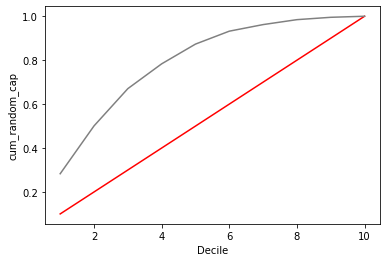

In [ ]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [ ]:
y_pred_prob = dtree.predict_proba(X_all)[:, 1]
df['pred_prob_dtree']=pd.DataFrame(y_pred_prob)
df['P_Rank_tree']=pd.qcut(df['pred_prob_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_tree')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_tree')['pred_prob_dtree'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_tree',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_tree,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.761702,0.772675,537.0,537.0,0.287319,0.287319,168.0,168.0,0.032470,0.032470,0.2548,0.100099,0.100099,1
1,9,704,0.565341,0.584296,398.0,935.0,0.212948,0.500268,306.0,474.0,0.059142,0.091612,0.4087,0.099957,0.200057,2
2,8,704,0.420455,0.417525,296.0,1231.0,0.158373,0.658641,408.0,882.0,0.078856,0.170468,0.4882,0.099957,0.300014,3
3,7,704,0.325284,0.338845,229.0,1460.0,0.122525,0.781166,475.0,1357.0,0.091805,0.262273,0.5189,0.099957,0.399972,4
4,6,704,0.211648,0.192832,149.0,1609.0,0.079722,0.860888,555.0,1912.0,0.107267,0.369540,0.4913,0.099957,0.499929,5
5,5,705,0.177305,0.172729,125.0,1734.0,0.066881,0.927769,580.0,2492.0,0.112099,0.481639,0.4461,0.100099,0.600028,6
6,4,704,0.099432,0.098124,70.0,1804.0,0.037453,0.965222,634.0,3126.0,0.122536,0.604175,0.3610,0.099957,0.699986,7
7,3,704,0.058239,0.054736,41.0,1845.0,0.021937,0.987159,663.0,3789.0,0.128141,0.732315,0.2548,0.099957,0.799943,8
8,2,704,0.019886,0.017148,14.0,1859.0,0.007491,0.994650,690.0,4479.0,0.133359,0.865675,0.1290,0.099957,0.899901,9
9,1,705,0.014184,0.006285,10.0,1869.0,0.005350,1.000000,695.0,5174.0,0.134325,1.000000,0.0000,0.100099,1.000000,10


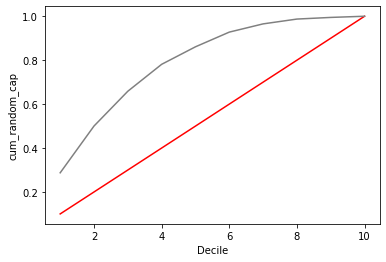

In [ ]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [ ]:
# Random Forest Lorenz Curve

In [ ]:
y_pred_prob = rf.predict_proba(X_all)[:, 1]
df['pred_prob_rf']=pd.DataFrame(y_pred_prob)
df['P_Rank_rf']=pd.qcut(df['pred_prob_rf'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_rf')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_rf')['pred_prob_rf'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_rf',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_rf,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.767376,0.646169,541.0,541.0,0.289460,0.289460,164.0,164.0,0.031697,0.031697,0.2578,0.100099,0.100099,1
1,9,704,0.580966,0.520266,409.0,950.0,0.218834,0.508293,295.0,459.0,0.057016,0.088713,0.4196,0.099957,0.200057,2
2,8,704,0.463068,0.412726,326.0,1276.0,0.174425,0.682718,378.0,837.0,0.073058,0.161770,0.5209,0.099957,0.300014,3
3,7,704,0.321023,0.319422,226.0,1502.0,0.120920,0.803638,478.0,1315.0,0.092385,0.254155,0.5495,0.099957,0.399972,4
4,6,704,0.217330,0.252837,153.0,1655.0,0.081862,0.885500,551.0,1866.0,0.106494,0.360649,0.5249,0.099957,0.499929,5
5,5,705,0.136170,0.192488,96.0,1751.0,0.051364,0.936865,609.0,2475.0,0.117704,0.478353,0.4585,0.100099,0.600028,6
6,4,704,0.088068,0.141573,62.0,1813.0,0.033173,0.970037,642.0,3117.0,0.124082,0.602435,0.3676,0.099957,0.699986,7
7,3,704,0.052557,0.092940,37.0,1850.0,0.019797,0.989834,667.0,3784.0,0.128914,0.731349,0.2585,0.099957,0.799943,8
8,2,704,0.018466,0.049348,13.0,1863.0,0.006956,0.996790,691.0,4475.0,0.133552,0.864901,0.1319,0.099957,0.899901,9
9,1,705,0.008511,0.020343,6.0,1869.0,0.003210,1.000000,699.0,5174.0,0.135099,1.000000,0.0000,0.100099,1.000000,10


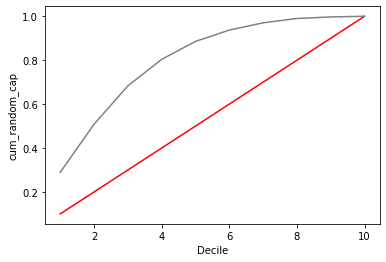

In [ ]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [ ]:
y_pred_prob = gbm.predict_proba(X_all)[:, 1]
df['pred_prob_gbm']=pd.DataFrame(y_pred_prob)
df['P_Rank_GBM']=pd.qcut(df['pred_prob_gbm'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_GBM')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['pred_prob_gbm'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_GBM,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.885106,0.799336,624.0,624.0,0.333868,0.333868,81.0,81.0,0.015655,0.015655,0.3182,0.100099,0.100099,1
1,9,704,0.629261,0.608925,443.0,1067.0,0.237025,0.570894,261.0,342.0,0.050445,0.066100,0.5048,0.099957,0.200057,2
2,8,704,0.468750,0.449262,330.0,1397.0,0.176565,0.747459,374.0,716.0,0.072284,0.138384,0.6091,0.099957,0.300014,3
3,7,704,0.305398,0.306319,215.0,1612.0,0.115035,0.862493,489.0,1205.0,0.094511,0.232895,0.6296,0.099957,0.399972,4
4,6,704,0.169034,0.196920,119.0,1731.0,0.063670,0.926164,585.0,1790.0,0.113065,0.345961,0.5802,0.099957,0.499929,5
5,5,705,0.109220,0.121999,77.0,1808.0,0.041199,0.967362,628.0,2418.0,0.121376,0.467337,0.5000,0.100099,0.600028,6
6,4,704,0.052557,0.078691,37.0,1845.0,0.019797,0.987159,667.0,3085.0,0.128914,0.596250,0.3909,0.099957,0.699986,7
7,3,704,0.019886,0.045229,14.0,1859.0,0.007491,0.994650,690.0,3775.0,0.133359,0.729610,0.2650,0.099957,0.799943,8
8,2,704,0.011364,0.023399,8.0,1867.0,0.004280,0.998930,696.0,4471.0,0.134519,0.864128,0.1348,0.099957,0.899901,9
9,1,705,0.002837,0.012811,2.0,1869.0,0.001070,1.000000,703.0,5174.0,0.135872,1.000000,0.0000,0.100099,1.000000,10


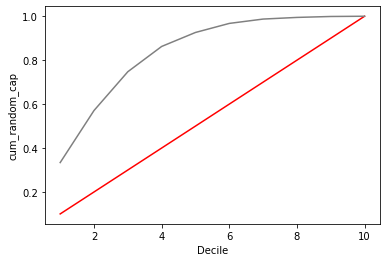

In [ ]:
ax = sns.lineplot( x="Decile", y="cum_random_cap", data=sorted_reindexed,color='red')
ax = sns.lineplot( x="Decile", y="cum_event_cap", data=sorted_reindexed,color='grey')

In [ ]:
y_pred_prob = clf.predict_proba(X_all)[:, 1]
df['pred_prob_stacking']=pd.DataFrame(y_pred_prob)
df['P_Rank_stacking']=pd.qcut(df['pred_prob_stacking'].rank(method='first').values,10,duplicates='drop').codes+1
rank_df_actuals=df.groupby('P_Rank_stacking')['target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_stacking')['pred_prob_stacking'].agg(['mean'])
rank_df_actuals=pd.DataFrame(rank_df_actuals)

rank_df_actuals.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_event_rate'},inplace=True)
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join="inner")

sorted_rank_df=rank_df.sort_values(by='P_Rank_stacking',ascending=False)
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum()
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum())
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()

sorted_rank_df['N_non_events']=sorted_rank_df['count']-sorted_rank_df['N_events']
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum()
sorted_rank_df['non_event_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum())
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['non_event_cap'].cumsum()

sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)

sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum())
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum()
sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1
sorted_reindexed

,P_Rank_stacking,count,Actual_event_rate,Predicted_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile
0,10,705,0.811348,0.771924,572.0,572.0,0.306046,0.306046,133.0,133.0,0.025705,0.025705,0.2803,0.100099,0.100099,1
1,9,704,0.603693,0.592613,425.0,997.0,0.227394,0.533440,279.0,412.0,0.053923,0.079629,0.4538,0.099957,0.200057,2
2,8,704,0.457386,0.412915,322.0,1319.0,0.172285,0.705725,382.0,794.0,0.073831,0.153460,0.5523,0.099957,0.300014,3
3,7,704,0.322443,0.268604,227.0,1546.0,0.121455,0.827180,477.0,1271.0,0.092192,0.245651,0.5815,0.099957,0.399972,4
4,6,704,0.204545,0.183297,144.0,1690.0,0.077047,0.904227,560.0,1831.0,0.108233,0.353885,0.5503,0.099957,0.499929,5
5,5,705,0.120567,0.130151,85.0,1775.0,0.045479,0.949706,620.0,2451.0,0.119830,0.473715,0.4760,0.100099,0.600028,6
6,4,704,0.076705,0.098365,54.0,1829.0,0.028892,0.978598,650.0,3101.0,0.125628,0.599343,0.3793,0.099957,0.699986,7
7,3,704,0.034091,0.075576,24.0,1853.0,0.012841,0.991439,680.0,3781.0,0.131426,0.730769,0.2607,0.099957,0.799943,8
8,2,704,0.015625,0.060120,11.0,1864.0,0.005886,0.997325,693.0,4474.0,0.133939,0.864708,0.1326,0.099957,0.899901,9
9,1,705,0.007092,0.051997,5.0,1869.0,0.002675,1.000000,700.0,5174.0,0.135292,1.000000,0.0000,0.100099,1.000000,10


In [ ]:
# Project Conclusion :- 
# The GBM Model has performed the best and will be used for Customer targeting with retention offers in Telecom

In [ ]:
df['Tenure_Rank']=pd.qcut(df['tenure'].rank(method='first').values,10,duplicates='drop').codes+1

In [ ]:
df.groupby('Tenure_Rank')['tenure'].agg(['min','max','mean'])

,min,max,mean
Tenure_Rank,,,
1,0,2,1.099291
2,2,6,3.566761
3,6,12,8.779830
4,12,20,15.531250
5,20,29,24.153191
6,29,40,34.004261
7,40,50,45.014205
8,50,60,55.370739
9,60,69,65.001420


In [ ]:
df['tenure'].mean()

32.37114865824223

In [ ]:
df['Tenure_Segment']=np.where(df['Tenure_Rank']<=6,"Low Tenure","High Tenure")

In [ ]:
df['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'].rank(method='first').values,10,duplicates='drop').codes+1

In [ ]:
df.groupby('MonthlyCharges_Rank')['MonthlyCharges'].agg(['min','max','mean'])

,min,max,mean
MonthlyCharges_Rank,,,
1,18.25,20.05,19.622482
2,20.05,25.05,21.732599
3,25.05,45.85,35.514773
4,45.85,58.75,52.532244
5,58.85,70.35,65.314965
6,70.35,79.10,74.623864
7,79.10,85.50,82.140057
8,85.50,94.25,89.840199
9,94.25,102.60,98.036364


In [ ]:
df['MonthlyCharges'].mean()

64.76169246059922

In [ ]:
df['Monthly_Charge_Segment']=np.where(df['MonthlyCharges_Rank']<=5,"Low Charges","High Charges")

In [ ]:
df['Predicted_Churn_Rank']=np.where(df['P_Rank_GBM']>=7,"Top 4","Bottom 6")

# Slice the data with respect to "Top 4" from the GBM Model output

In [ ]:
df_top4=df.loc[df['Predicted_Churn_Rank']=='Top 4',:]

In [ ]:
service_list=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'
              ,'StreamingTV','StreamingMovies','Contract','PaperlessBilling']
#target=['target']

#total=service_list+target

In [ ]:
df_top4_services=df_top4[service_list]

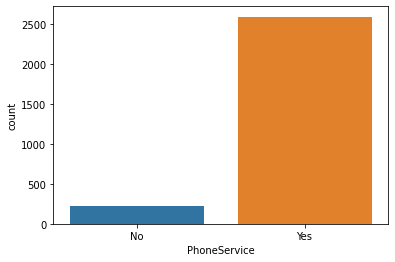

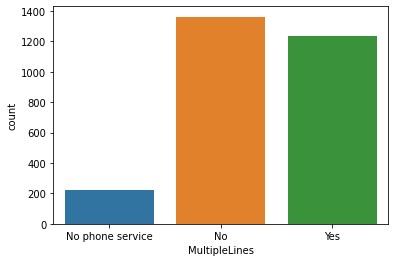

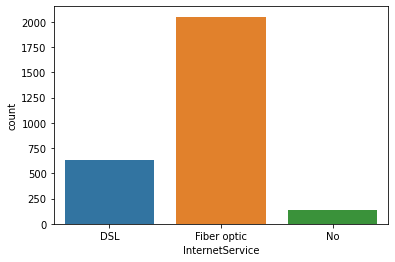

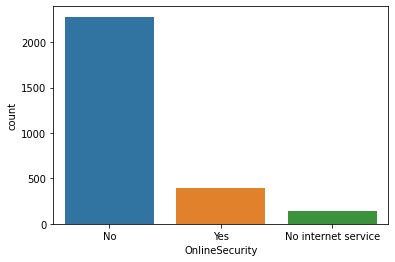

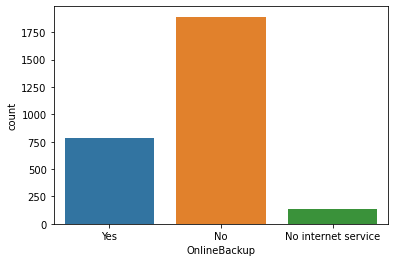

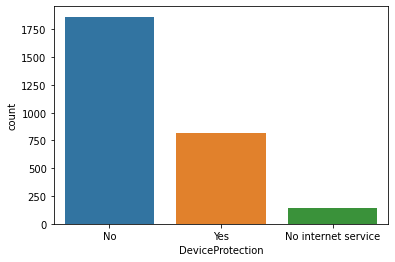

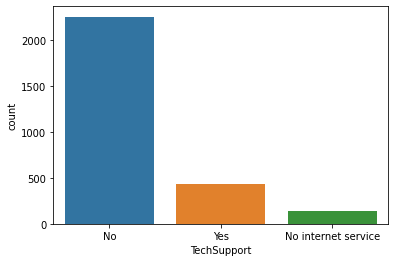

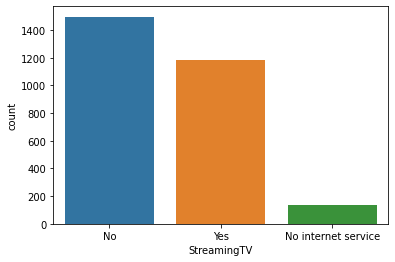

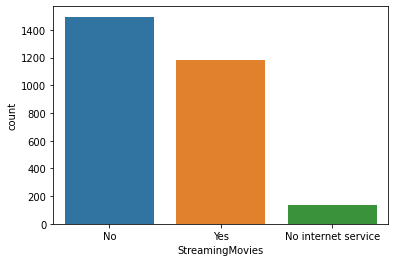

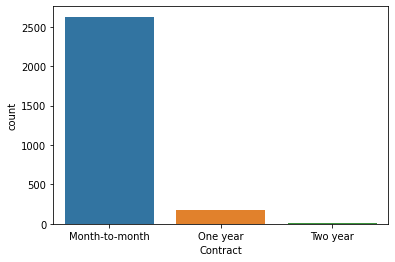

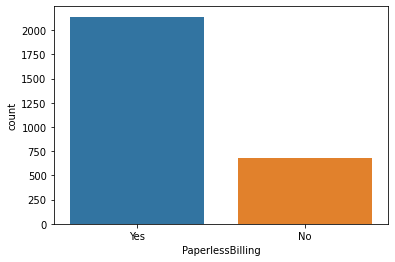

In [ ]:
for col in (df_top4_services.columns):
    plt.figure()
    sns.countplot(x=col,data=df_top4_services)
plt.show()

In [ ]:
pd.crosstab(index=df_top4['Monthly_Charge_Segment'], columns=df_top4['Tenure_Segment'],values=df_top4['MonthlyCharges'],aggfunc='mean')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,98.658179,86.851074
Low Charges,43.060000,45.778774


In [ ]:
pd.crosstab(index=df_top4['Monthly_Charge_Segment'], columns=df_top4['Tenure_Segment'],values=df_top4['target'],aggfunc='count')

Tenure_Segment,High Tenure,Low Tenure
Monthly_Charge_Segment,,
High Charges,379,1537
Low Charges,20,881


In [ ]:
###### Recommendations ##########
# Device Protection with Online Services
# Convert customer to DSL if they are facing challenges with Fiber Optics
# Offer discounts on Yearly contracts